In [12]:
import numpy as np

# Define the prior parameters
sigma = 1.0
mean = np.zeros(2)  # 2D Gaussian, mean is zero
cov = sigma**2 * np.eye(2)  # Covariance matrix

# Sample W from the prior
W_sample = np.random.multivariate_normal(mean, cov, size=1)
W_sample


array([[0.29761988, 1.08844664]])

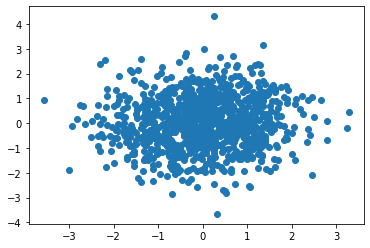

In [9]:
import matplotlib.pyplot as plt
plt.scatter(W_sample[:, 0], W_sample[:, 1])

In [13]:
# Define a single data point (x1, x2) and its label
X_single = np.array([0.5, -0.3])  # Example data point in the region [-B, B] x [-B, B]
y_single = 1  # Binary label

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression likelihood: P(y|W, X)
def likelihood(W, X, y):
    z = np.dot(W, X)
    return sigmoid(z) if y == 1 else 1 - sigmoid(z)

# Evaluate likelihood of the sample W with the data point
likelihood_value = likelihood(W_sample, X_single, y_single)
likelihood_value


array([0.45568557])

In [14]:
# Example dataset of 5 points
X_data = np.array([[0.5, -0.3], [-0.2, 0.4], [0.3, -0.1], [-0.5, 0.2], [0.1, -0.4]])
y_data = np.array([1, 0, 1, 0, 1])

# Compute likelihood for the dataset
def dataset_likelihood(W, X_data, y_data):
    return np.prod([likelihood(W, X_data[i], y_data[i]) for i in range(len(y_data))])

# Evaluate likelihood of W_sample on the dataset
likelihood_dataset = dataset_likelihood(W_sample, X_data, y_data)
likelihood_dataset


0.017736724418328034

In [15]:
# Define a function for the posterior (up to a normalization constant)
def posterior(W, X_data, y_data, prior_mean, prior_cov):
    # Likelihood of the dataset
    likelihood_val = dataset_likelihood(W, X_data, y_data)
    # Prior probability P(W)
    prior_val = np.exp(-0.5 * np.dot((W - prior_mean).T, np.linalg.inv(prior_cov).dot(W - prior_mean)))
    return likelihood_val * prior_val

# Grid of W values for visualization
W_grid = np.random.multivariate_normal(mean, cov, size=1000)

# Compute posterior values for each W in the grid
posterior_values = np.array([posterior(W, X_data, y_data, mean, cov) for W in W_grid])
posterior_values /= np.sum(posterior_values)  # Normalize the posterior


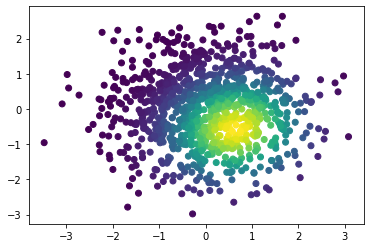

In [18]:
plt.scatter(W_grid[:, 0], W_grid[:, 1], c=posterior_values)

Example: Feature design

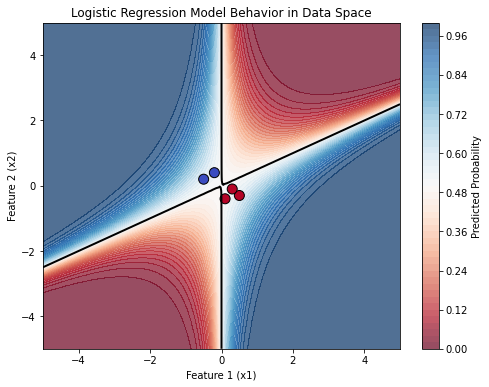

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example logistic regression model
def logistic_regression(W, X):
    return sigmoid(np.dot(X, W))

# Generate a grid of points in data space
x1_range = np.linspace(-5, 5, 100)
x2_range = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
SHOW_ORIGINAL_FEATURES = False
if SHOW_ORIGINAL_FEATURES:
    X_grid = np.c_[x1.ravel(), x2.ravel()]
else:
    X_grid = np.c_[x1.ravel()**2, x2.ravel() * x1.ravel()]

# Sample weights W for demonstration
W_example = np.array([0.5, -1.0,])
# W_example = np.array([1.0, -2.0, 2.0])

# Calculate model predictions for the grid points
predictions = logistic_regression(W_example, X_grid)
predictions = predictions.reshape(x1.shape)

# Plot the model behavior
plt.figure(figsize=(8, 6))
plt.contourf(x1, x2, predictions, levels=50, cmap='RdBu', alpha=0.7)
plt.colorbar(label='Predicted Probability')

# Add decision boundary (where prediction = 0.5)
plt.contour(x1, x2, predictions, levels=[0.5], colors='black', linewidths=2)

# Plot some example data points
X_data = np.array([[0.5, -0.3], [-0.2, 0.4], [0.3, -0.1], [-0.5, 0.2], [0.1, -0.4]])
y_data = np.array([1, 0, 1, 0, 1])
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, edgecolors='k', cmap='coolwarm', s=100)

plt.title('Logistic Regression Model Behavior in Data Space')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.show()


Example: Features as functions

$F: Data \to \mathbb R$

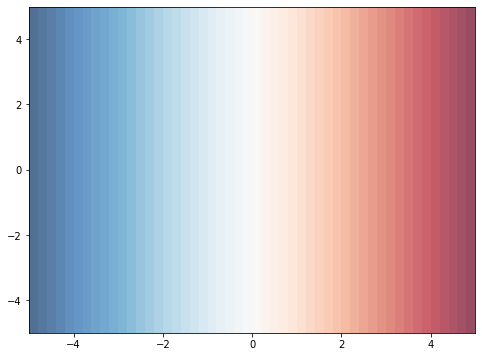

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example logistic regression model
def logistic_regression(W, X):
    return sigmoid(np.dot(X, W))

# Generate a grid of points in data space
x1_range = np.linspace(-5, 5, 100)
x2_range = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
# X_grid = np.c_[x1.ravel(), x2.ravel()]
X_grid = np.c_[x1.ravel(), x2.ravel()]

# Sample weights W for demonstration
def X1(x):
    # x: x[0], x[1]
    return x[0]
def X2(x):
    # x: x[0], x[1]
    return x[1]
def f1(x):
    return np.sin(x[0]*x[1])

def k1(y):
    s = np.exp( - ((y[0] - 0.3) ** 2 + (y[1]-0.5) ** 2) )
    return s

# Kernels for function design
def ker_l(x, y):
    return x[0] * y[0] + x[1] * y[1]

ker_l_1 = lambda y: ker_l(np.array([1, 0]), y)

f = ker_l_1

predictions = np.array([f(x) for x in X_grid])
predictions = predictions.reshape(x1.shape)

plt.figure(figsize=(8, 6))
plt.contourf(x1, x2, predictions, levels=50, cmap='RdBu_r', alpha=0.7)

